In [4]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image

import pandas as pd
import numpy as np
import pydotplus
import os

In [6]:
tennis_data = pd.read_csv('/Users/Moon/Desktop/Summer/Machin Learning/ML_200722/playtennis.csv')
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [7]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 5)

tennis_data.Humidity = tennis_data.Humidity.replace('High', 6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 7)

tennis_data.Wind = tennis_data.Wind.replace('Weak', 8)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 9)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 11)

tennis_data

#데이터에 존재하는 모든 문자열을 숫자타입으로 변환

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [8]:
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))
#X와 y를 나누어서 지정 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
#train과 test셋으로 분리 

In [11]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)
#의사결정나무를 불러오고 해당 모델에 train데이터셋으로 학습

In [13]:
dt_prediction = dt_clf.predict(X_test)
#test셋을 넣어 추정값을 출력 

In [14]:
print(confusion_matrix(y_test, dt_prediction))
#혼동행렬을 출력

[[0 1]
 [2 1]]


In [15]:
print(classification_report(y_test, dt_prediction))
#모델의 성능이 정말 좋지못함 
#f1점수도 좋지못하고 재현율도 좋지못하다
#하이퍼 파라미터를 조정하거나 해당 데이터셋에서는 다른 모델을 사용하는 것이 적합 

              precision    recall  f1-score   support

          10       0.00      0.00      0.00         1
          11       0.50      0.33      0.40         3

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4



### Iris

In [16]:
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

print(iris.target_names)

iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()
#iris_data에는 독립변수, iris_target에는 종속변수를 넣어줌 
#해당 데이터를 pandas를 사용하여 데이터프레임으로 변환

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris_label, test_size = 0.3, random_state = 11)

In [20]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train ,y_train)
#의사결정나무에 학습데이터셋을 가지고 학습을 해줌 
#min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수 (과적합 제어로 사용)
#min_samples_leaf : 말단 노드가 되기위한 최소의 샘플 데이터 수 
#max_features : 최적의 분할을 위해 고려할 최대 피처 개수 
#max_depth : 트리의 최대 깊이 
#max_leaf_nodes : 말단 노드의 최대 개수 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=11, splitter='best')

In [21]:
pred = dt_clf.predict(X_test)
#테스트데이터를 통해 추정값을 도출 

In [22]:
from sklearn.metrics import accuracy_score
print("예측 정확도 {0:.4f}".format(accuracy_score(y_test,pred)))
#예측 정확도가 91%정도로 좋은 성능을 보여주고 있음 

예측 정확도 0.9111


In [23]:
#graphviz : 그래프를 시각화하기 위한 패키지(의사결정나무 모델을 시각화 할 수 있음 )

In [24]:
import graphviz

In [27]:
import warnings
warnings.filterwarnings('ignore')
#출력에서 warinings가 뜨는 것을 방지 

In [34]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

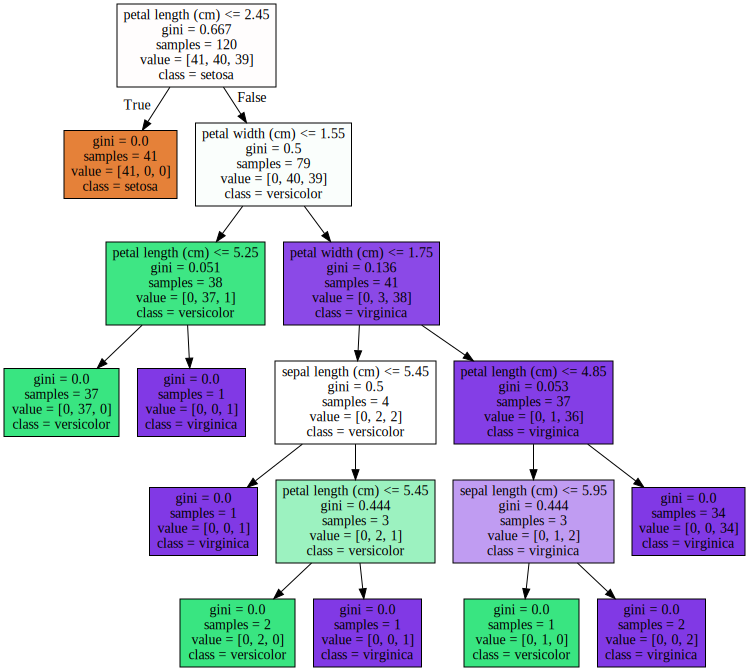

In [35]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
#밑의 그래프를 보면 깊어질수록 지니계수가 작아지는 것을 볼 수 있음 

In [36]:
import seaborn as sns
import numpy as np
%matplotlib inline

Feature importances : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


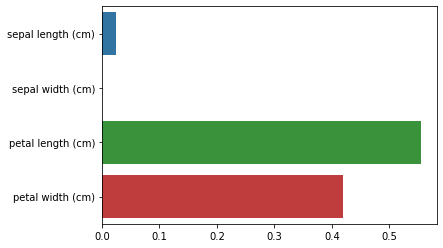

In [39]:
print('Feature importances : \n{0}'. format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)
#각 변수의 중요도를 평균한 값을 출력?
#반복문을 사용해서 각 변수의 이름과 중요도를 한번에 출력하는 코드
#시각화(x축에 변수의 중요도(수치), y = 변수의 이름 )

### Decision Tree & Overfitting

In [41]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


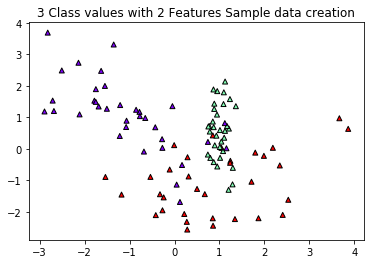

In [43]:
plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                           n_classes = 3, n_clusters_per_class = 1, random_state = 0)
plt.scatter(X_features[:,0], X_features[:,1], marker = '^', c = y_labels, s = 25, cmap = 'rainbow', edgecolor = 'k')
#n_features : 독립변수의 수 
#n_informative : 독립변수 중 종속변수와 상관관계가 있는 성분의 수 
#n_redundant : 독립변수 중 다른 독립 변수의 선형조합으로 나타나는 성분의 수 
#n_repeated : 독립변수 중 단순 중복된 성분의 수 
#n_classes : 종속변수의 클래스 수 
#n_clusters_per_class : 클래스 당 클러스터 수 

#2개의 독립변수에서 각 독립변수는 서로 상관관계가 있으며 종속변수는 3개로 분류되어 있으며 클래스당 1개의 클러스터가 존재하는 임의의 데이터를 생성 

In [59]:
def visualize_boundary(model, X, y):
    fog, ax = plt.subplots()
    
    ax.scatter(X[:,0], X[:,1], c= y, s = 25, cmap = 'rainbow', edgecolor = 'k',
               clim = (y.min(), y.max()), zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()# 축을 만들기
    ylim_start, ylim_end = ax.get_ylim()# 축을 만들기
    
    model.fit(X,y)
    
    xx,yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num = 200), np.linspace(ylim_start, ylim_end, num = 200))
    #meshgrid형태인 모든 자표값으로 예측 수행 
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3,
                           levels = np.arange(n_classes + 1) - 0.5,
                           cmap = 'rainbow', clim = (y.min(), y.max()),
                                                    zorder = 1)
    
#scatter : s(포인트의 크기), c(포인트의 색깔), 

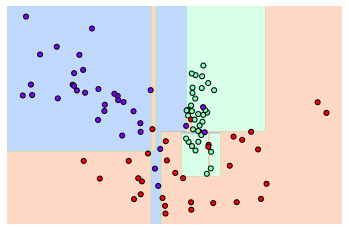

In [60]:
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)
#이러한 형태로 시각화를 해줌 

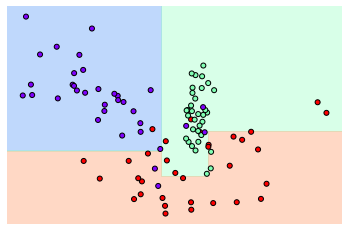

In [61]:
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)
#의사결정나무의 말단노드의 데이터수를 6으로 제약을 주니 분류의 경계가 부드러워졌음
#즉 파라미터 조정을 통해 조절할 수 있다는 것을 확인을 할 수 있음 


### 하이퍼파라미터 조정을 통해 OverFitting을 유발하지않도록 조정을 할 수 있음